In [10]:

import numpy as np
from sklearn import datasets 
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import seaborn as sns

from math import log

from lib.NaiveBayesClassifier import NaiveBayesClassifier
from lib.GridSearch import *

In [2]:
mnist = datasets.load_digits(return_X_y=True)
X, y = mnist

n = int(np.ceil(np.sqrt(X.shape[1])))

print(n)

print(X.shape, y.shape)

8
(1797, 64) (1797,)


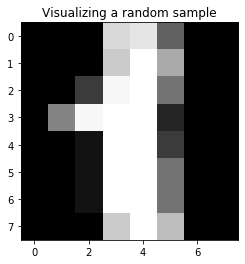

In [3]:
plt.imshow(np.reshape(X[1], [n,n]), cmap='Greys_r'); 
plt.title('Visualizing a random sample'); plt.show()

In [4]:
X, y = mnist
X = X/255
y = y

all_results = []
print(X.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=5)



(1797, 64) (1797,)


In [7]:
nbmodel = NaiveBayesClassifier(bandwidth=1,kernel='radial')
nbmodel.fit(x_train, y_train)
print("Performance of radial kernel with bandwidth '1' for Test set: %.4f"%nbmodel.score(x_test,y_test))

Performance of radial kernel with bandwidth '1' for Test set: 0.0796


In [8]:
nbmodel = NaiveBayesClassifier(bandwidth=1,kernel='hypercube')
nbmodel.fit(x_train, y_train)
print("Performance of hypercube kernel with bandwidth '1' for Test set: %.4f"%nbmodel.score(x_test,y_test))

Performance of hypercube kernel with bandwidth '1' for Test set: 0.0796


Best Val Accuracy 0.9788 | Bandwidths: 0.0953
Performance of best hypercube model for Test set: 0.9630
CPU times: user 1.07 s, sys: 161 ms, total: 1.23 s
Wall time: 1.85 s


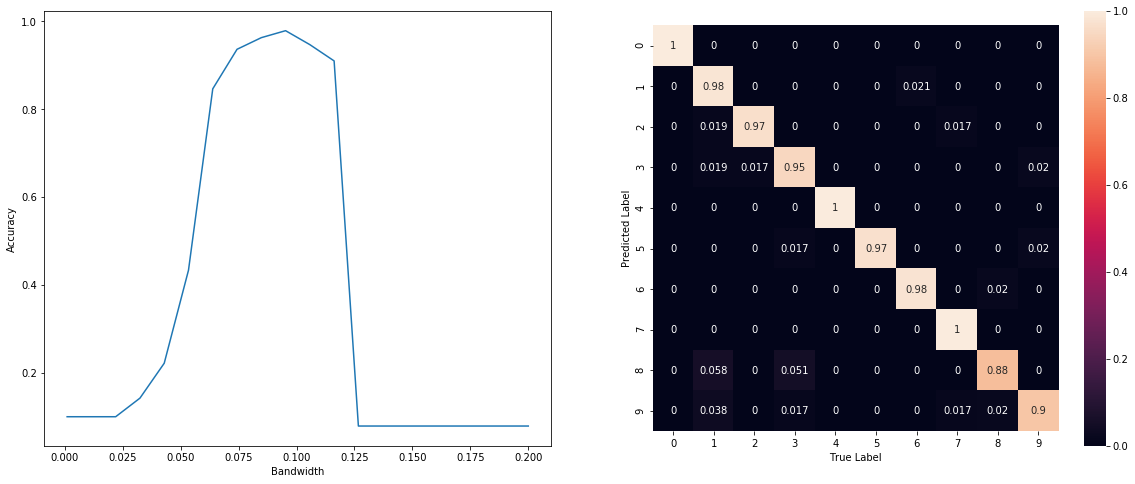

In [13]:
%%time
# bandwidths = [1e-1,1e-2,2e-2,3e-2,7e-2,9e-2,1e-3]   # values to be tunned
bandwidths = np.linspace(1e-3, 2e-1, 20)
kernels = ['hypercube'] # values to be tunned

results = grid_search(x_train, y_train, bandwidths, kernels, multi_bw=False)
best_params, best_results, best_model = results[np.argmax(results[:,1])]
rdf = pd.DataFrame({'bw':[sub[0] for sub in results[:,0]] ,'accr':results[:,1]})
rdf.sort_values(by=['bw'], inplace=True)
print("Best Val Accuracy %.4f | Bandwidths: %.4f"\
      %(best_results,best_params[0]))
# best_params, radial_results = grid_search(bandwidths, kernels)
print("Performance of best hypercube model for Test set: %.4f"%best_model.score(x_test,y_test))

all_results.append({'Classifier':'Radial','Bandwidth Type':'Single',\
                   'Bandwidth':best_params[0],'Accuracy score':best_model.score(x_test,y_test)})
confMat = confusion_matrix(y_test, best_model.pred_y)
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(rdf['bw'] , rdf['accr'])
ax[0].set(xlabel='Bandwidth',ylabel='Accuracy')
sns.heatmap(confMat/np.sum(confMat,axis=1), annot=True,  square=True, ax=ax[1])
ax[1].set(xlabel='True Label', ylabel='Predicted Label')
plt.show()